### A1: Predicting Car Price

In [4]:
### Importing the necessary libraries for this project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
## Checking the version of libraries 
import matplotlib 
np.__version__, pd.__version__,sns.__version__, matplotlib.__version__

('2.3.2', '2.3.2', '0.13.2', '3.10.5')

In [6]:
## Loading data from a CSV file
df = pd.read_csv("Cars.csv")

In [7]:
# Displaying the first sample of Data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
# Checking the Shape of Data that is number of samples and numbers of columns 
df.shape

(8128, 13)

In [10]:
# Inspecting some useful statistical information using describe() method of numerical columns only.
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [11]:
# Checking the data types of all features and targets because it helps to determine the model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [13]:
## Checking the null values in the dataframe

df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [15]:
# Checking the columns name:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### Task 1 

- 1.1 For the feature owner, map First owner to 1, ..., Test Drive Car to 5

In [16]:
## Checking the column 'owner' 
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [17]:
# mapping the column 'owner' first owner =1 , Second Owner = 2, Third Owner =3, Fourth & Above Owner = 4 and Test Drive Car = 5
owner_maping = {"First Owner": 1 ,'Second Owner': 2, 'Third Owner':3, 'Fourth & Above Owner':4, 'Test Drive Car': 5 }
df["owner"] = df["owner"].map(owner_maping)
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [18]:
#Veryfying the output of the label owner
df["owner"].unique()

array([1, 2, 3, 4, 5])

1.2 For the feature fuel, remove all rows with CNG and LPG

In [19]:
## Checking the unique values in the Fuel Column
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [20]:
# Counting all unique values in 'fuel' column
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [21]:
# Taking the rows in which do not contains the 'LPG', 'CNG' values
exclude_values = ['LPG','CNG']
df = df[~(df['fuel'].isin(exclude_values))]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [22]:
# final checking the fuel column
df.fuel.unique()

array(['Diesel', 'Petrol'], dtype=object)

1.3 For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).

In [23]:
## Checking the mileage Column of Df
df['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [24]:
##First splitting the the values and only taking numerical value and saving to exiting database
df['mileage'] = df['mileage'].str.split().str[0]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [25]:
# converting the data type of mileage features to float 
df['mileage'] = df['mileage'].astype(float)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [26]:
# checking the data types of mileage
df['mileage'].dtype

dtype('float64')

1.4 For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)

In [27]:
## Removing the CC from the feature engine and converting the dtype from object to float
df['engine'] = df['engine'].str.split().str[0]

In [28]:
# converting the data types of feature engine
df['engine'] = df['engine'].astype(float)
# checking the data types of Feature engine
df['engine'].dtype

dtype('float64')

1.5 Do the same for max power

In [29]:
# Checking the data of feature max_power:
df['max_power'].head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [30]:
# removing bhp from the data of feature max_power and converting its data type to float
df['max_power'] = df['max_power'].str.split().str[0]
df['max_power']=df['max_power'].astype(float)
df['max_power'].head()

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

1.5 For the feature brand, take only the first word and remove the rest

In [31]:
# for the feature brand. since there is no brand I will rename name to brand of the df 
df = df.rename(columns = {"name":"brand"})

In [32]:
# Getting only the first word of values of brand. 
df['brand'] = df['brand'].str.split().str[0]
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


1.6 Drop the feature torque, simply

In [33]:
df.drop(['torque'], axis = 1, inplace = True )

In [34]:
## Display first five rows of the dataframe
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


1.7 Deleting Test Drive Cars from the column Owner



In [35]:
df = df.loc[df['owner'] != 5]
df


,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [36]:
# checking the Onwer Column
df.owner.unique()

array([1, 2, 3, 4])

In [37]:
# Displaying Final Data
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [38]:
df.isnull().sum() # checking the missing values.

brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


In [47]:
# Selecting Categorical Variables
cat_variables = df.select_dtypes(exclude=['int64','float64'])
print(cat_variables)

        brand    fuel seller_type transmission
0      Maruti  Diesel  Individual       Manual
1       Skoda  Diesel  Individual       Manual
2       Honda  Petrol  Individual       Manual
3     Hyundai  Diesel  Individual       Manual
4      Maruti  Petrol  Individual       Manual
...       ...     ...         ...          ...
8123  Hyundai  Petrol  Individual       Manual
8124  Hyundai  Diesel  Individual       Manual
8125   Maruti  Diesel  Individual       Manual
8126     Tata  Diesel  Individual       Manual
8127     Tata  Diesel  Individual       Manual

[8028 rows x 4 columns]


In [48]:
# Selecting numerical Variables
num_variables = df.select_dtypes(include=['int64','float64'])
print(num_variables)

      year  selling_price  km_driven  owner  mileage  engine  max_power  seats
0     2014         450000     145500      1    23.40  1248.0      74.00    5.0
1     2014         370000     120000      2    21.14  1498.0     103.52    5.0
2     2006         158000     140000      3    17.70  1497.0      78.00    5.0
3     2010         225000     127000      1    23.00  1396.0      90.00    5.0
4     2007         130000     120000      1    16.10  1298.0      88.20    5.0
...    ...            ...        ...    ...      ...     ...        ...    ...
8123  2013         320000     110000      1    18.50  1197.0      82.85    5.0
8124  2007         135000     119000      4    16.80  1493.0     110.00    5.0
8125  2009         382000     120000      1    19.30  1248.0      73.90    5.0
8126  2013         290000      25000      1    23.57  1396.0      70.00    5.0
8127  2013         290000      25000      1    23.57  1396.0      70.00    5.0

[8028 rows x 8 columns]


### Peforming EDA

#### Univariate Analysis

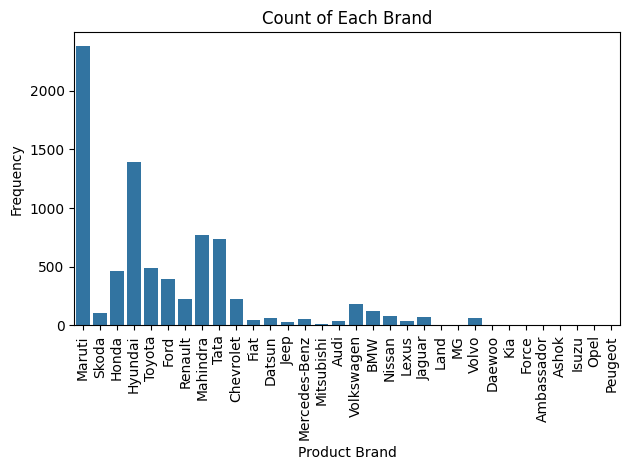

In [44]:
# Create the countplot and save it to an Axes object
ax = sns.countplot(x='brand', data=df)

# Rotate the x-axis labels using the Axes object's method
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Optional: Add titles and labels using the Axes object
ax.set_title('Count of Each Brand')
ax.set_xlabel('Product Brand')
ax.set_ylabel('Frequency')

# Optional: Adjust the plot
plt.tight_layout()

plt.show()

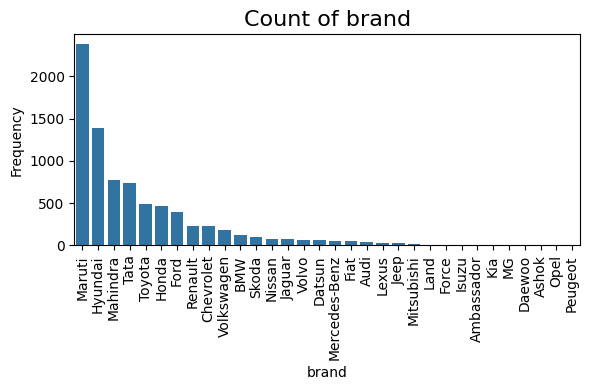

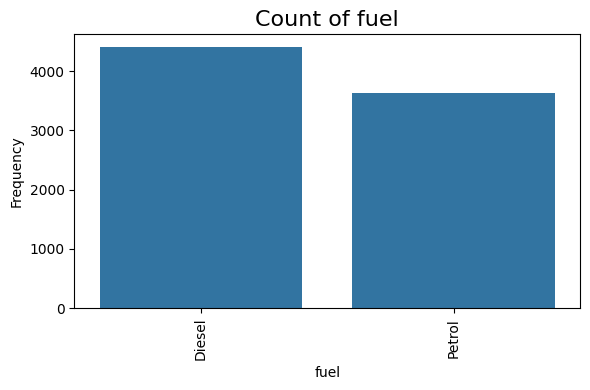

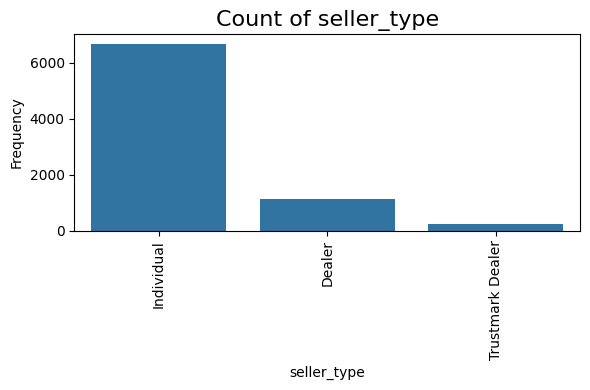

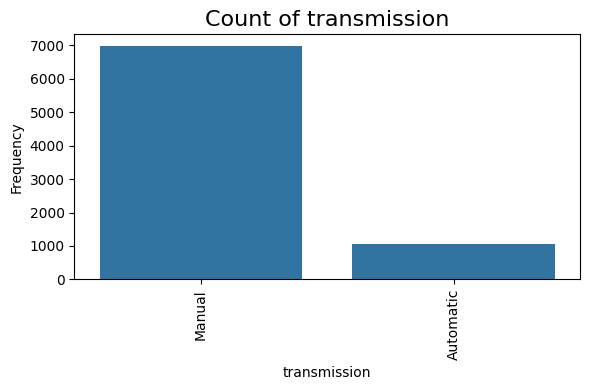

In [73]:
for column in cat_variables.columns:
    plt.figure(figsize=(6, 4))
    
    # Countplot for categorical variables
    ax = sns.countplot(x=column, data=cat_variables, order=cat_variables[column].value_counts().index)
    
    # Rotate labels if many categories
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    # Titles and labels
    ax.set_title(f'Count of {column}', fontsize=16)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()



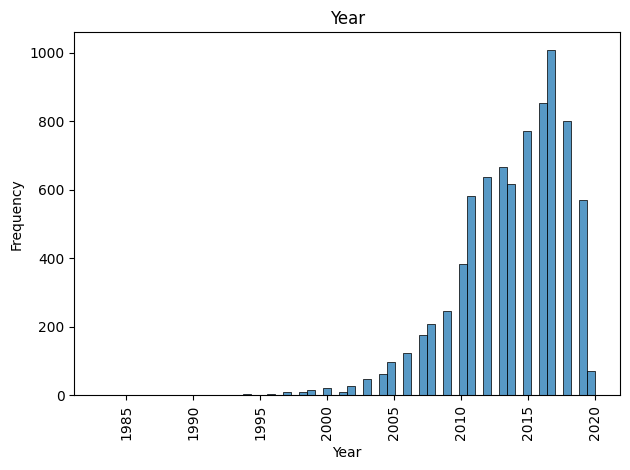

In [ ]:
# Create the countplot and save it to an Axes object
ax = sns.countplot(x='year', data=df)

# Rotate the x-axis labels using the Axes object's method
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Optional: Add titles and labels using the Axes object
ax.set_title('Year')
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')

# Optional: Adjust the plot
plt.tight_layout()

plt.show()

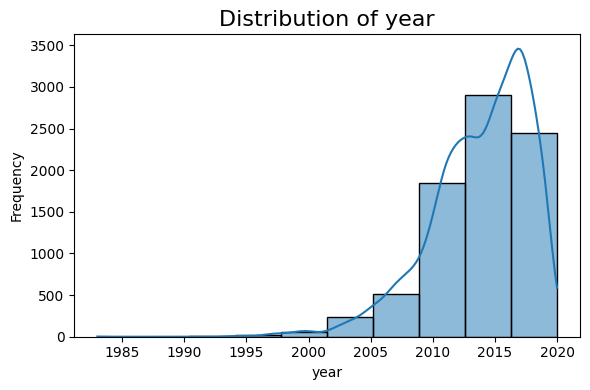

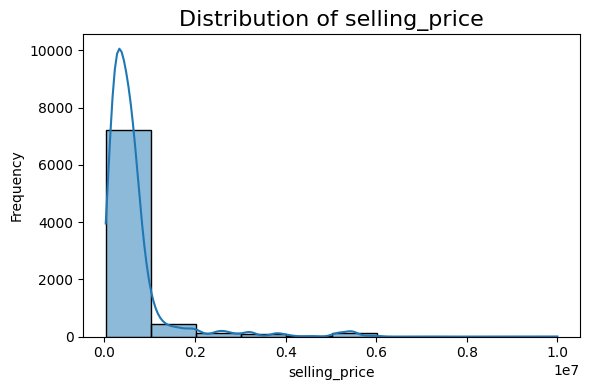

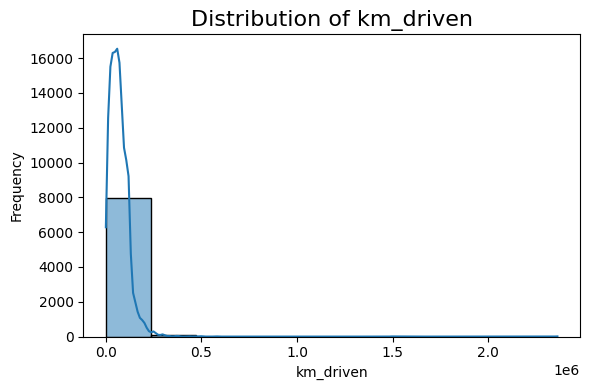

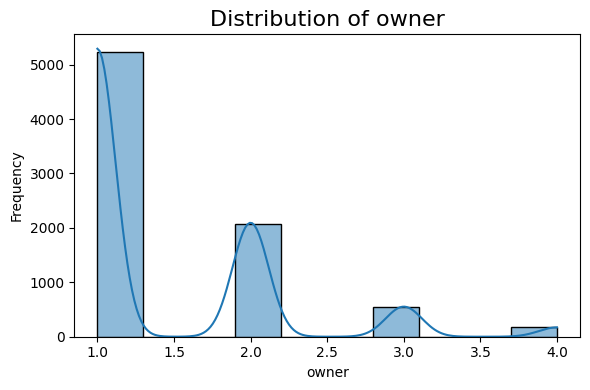

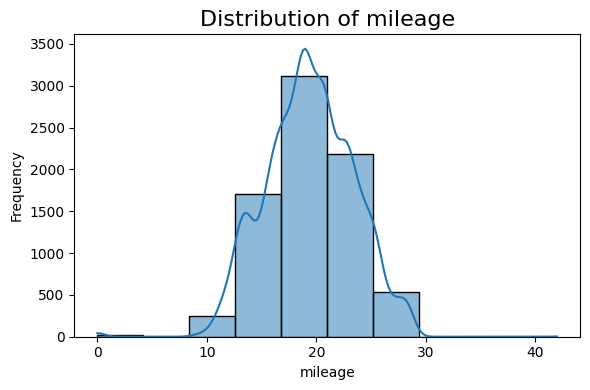

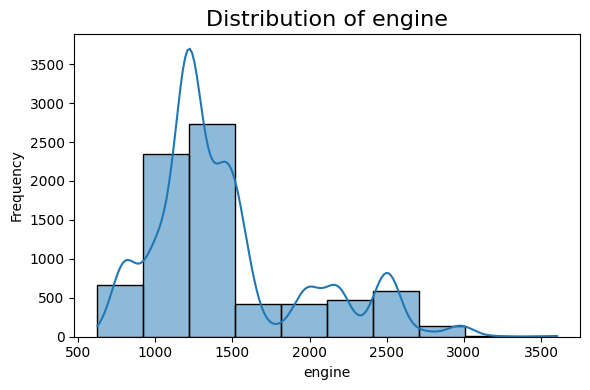

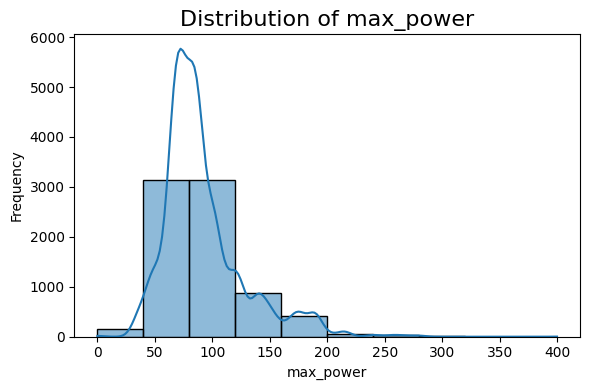

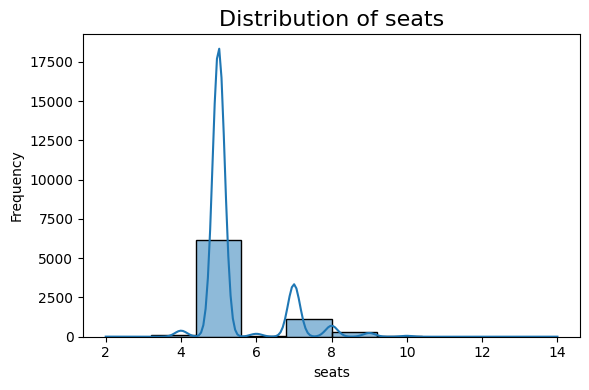

In [72]:
for column in num_variables.columns:
    plt.figure(figsize=(6, 4))
    
    # Pass the data, not just the column name
    sns.histplot(data=num_variables, x=column, bins=10, kde=True)  
    
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### Multivariate Analysis

<Axes: xlabel='year', ylabel='selling_price'>

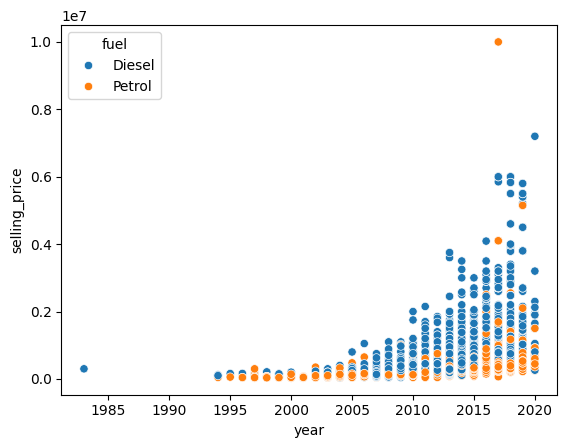

In [80]:
# viewing selling data across different year. 
sns.scatterplot(x = 'year', y = 'selling_price', data = df, hue = 'fuel')

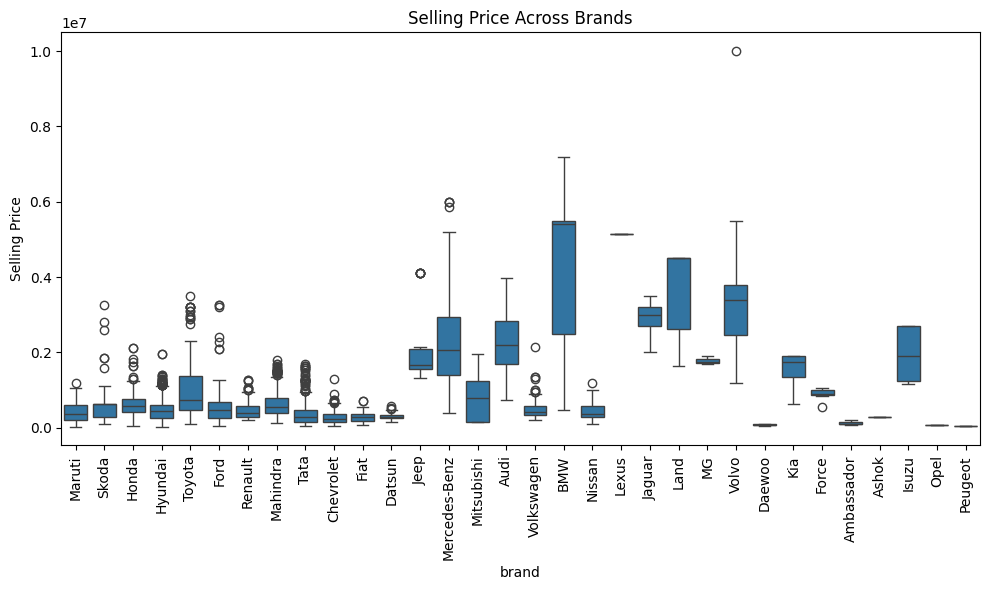

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='brand', y='selling_price', data=df)

plt.xticks(rotation=90)
plt.ylabel("Selling Price")
plt.title("Selling Price Across Brands")
plt.tight_layout()
plt.show()

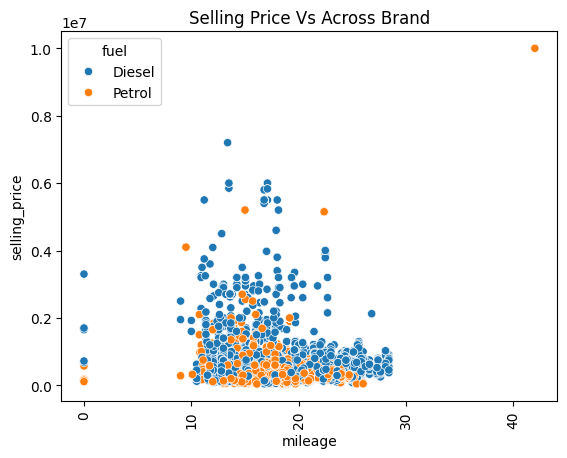

In [105]:
sns.scatterplot(x='mileage', y='selling_price', hue='fuel', data=df)
plt.xticks(rotation=90)
plt.title("Selling Price Vs Across Brand")
plt.show()

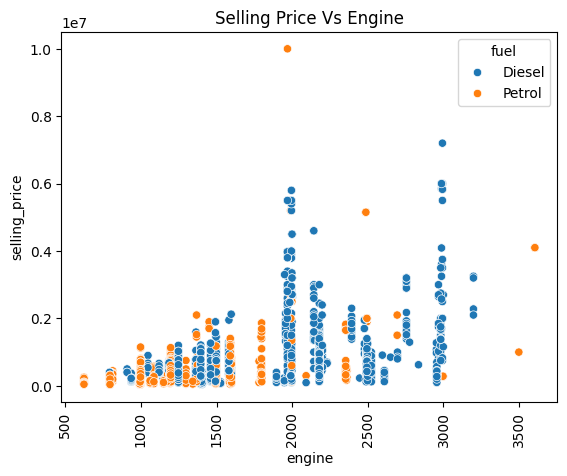

In [108]:
sns.scatterplot(x='engine', y='selling_price', hue='fuel', data=df)
plt.xticks(rotation=90)
plt.title("Selling Price Vs Engine")
plt.show()

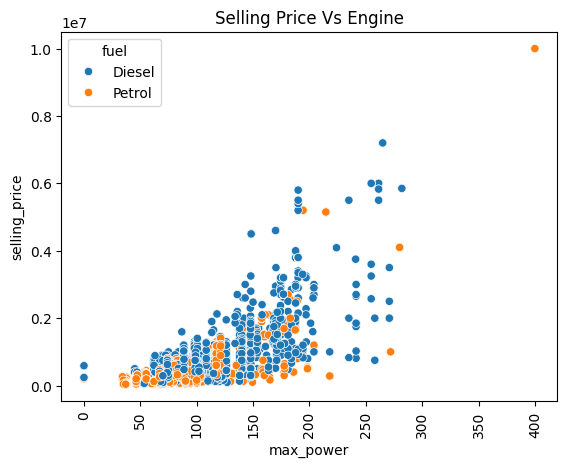

In [109]:
sns.scatterplot(x='max_power', y='selling_price', hue='fuel', data=df)
plt.xticks(rotation=90)
plt.title("Selling Price Vs Engine")
plt.show()

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


In [ ]:
sns.scatterplot(x='max_power', y='selling_price', hue='fuel', data=df)
plt.xticks(rotation=90)
plt.title("Selling Price Vs Engine")
plt.show()

<Axes: xlabel='seats', ylabel='selling_price'>

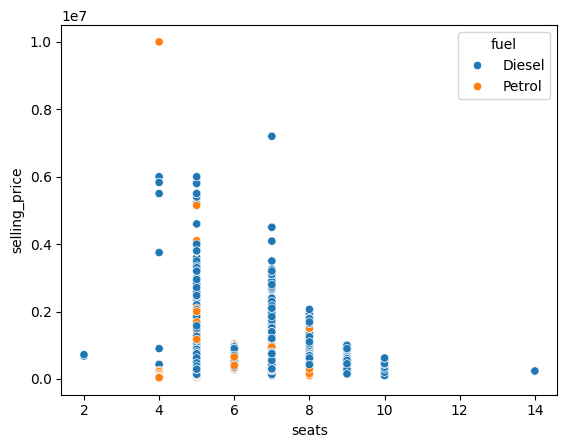

In [112]:
sns.scatterplot(x = df['seats'], y= df['selling_price'], hue=df['fuel'])

### Label Encoding

In [114]:
# label encoder from sklearn 
from sklearn.preprocessing import LabelEncoder
label_brand = LabelEncoder()
# Fitting and transforming the 'brand' column
df['brand'] = label_brand.fit_transform(df['brand'])
df["brand"].unique()


array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [115]:
label_brand.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [116]:
# Displaying the first few rows of the DataFrame with label encoding
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [117]:
#  label encoding for the fuel 
from sklearn.preprocessing import LabelEncoder
label_fuel = LabelEncoder()
df['fuel'] = label_fuel.fit_transform(df['fuel'])
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,0,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,1,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,0,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,1,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [118]:
label_fuel.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [119]:
# Encoding transmission feature with labelEncoder
from sklearn.preprocessing import LabelEncoder
label_transmission = LabelEncoder()
df['transmission'] = label_transmission.fit_transform(df['transmission'])
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,Individual,1,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,0,Individual,1,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,1,Individual,1,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,0,Individual,1,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,1,Individual,1,1,16.10,1298.0,88.20,5.0


In [120]:
# Encoding seller_type features with label encoding
from sklearn.preprocessing import LabelEncoder
label_seller_type = LabelEncoder()
df['seller_type'] = label_seller_type.fit_transform(df['seller_type'])
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0


In [121]:
label_transmission.classes_

array(['Automatic', 'Manual'], dtype=object)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   int64  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int64  
 5   seller_type    8028 non-null   int64  
 6   transmission   8028 non-null   int64  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 815.3 KB


<Axes: >

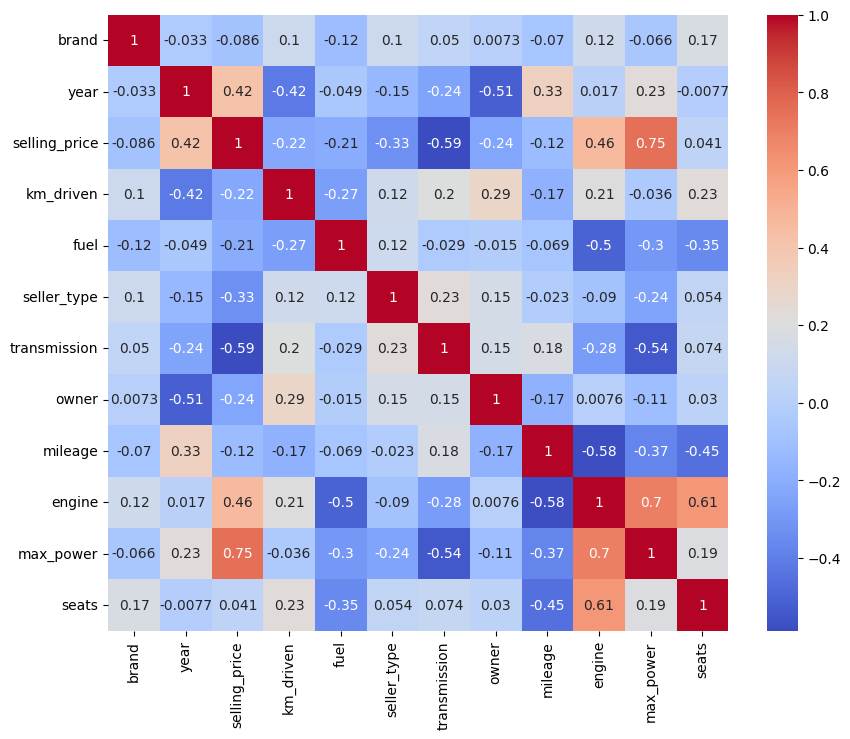

In [133]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")

In [187]:
# Saving this dataframe in csv 
df.to_csv('car_final_le.csv',sep = ',', index = False, encoding = 'utf-8')

In [123]:
# Checking the Data
df.isnull().sum()

brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64

In [124]:
# Getting X and y
X = df.drop(columns="selling_price")
y = np.log(df["selling_price"])

In [126]:
y

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8028, dtype: float64

In [136]:
# Spliting to Train and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [137]:
X_train.isnull().sum()

brand             0
year              0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage         171
engine          171
max_power       165
seats           171
dtype: int64

In [138]:
X_test.isnull().sum()

brand            0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage         43
engine          43
max_power       43
seats           43
dtype: int64

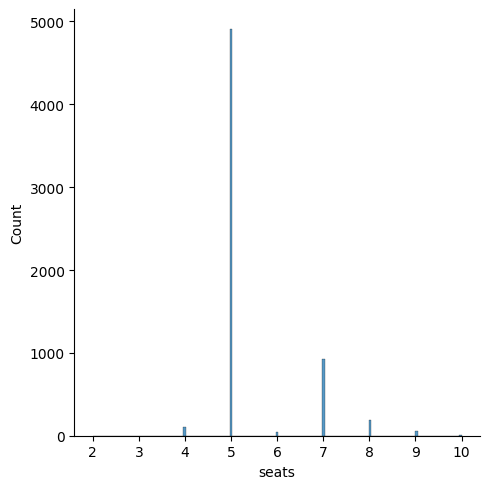

In [145]:
# now checking the distribution of columsn
sns.displot(x='seats', data = X_train)

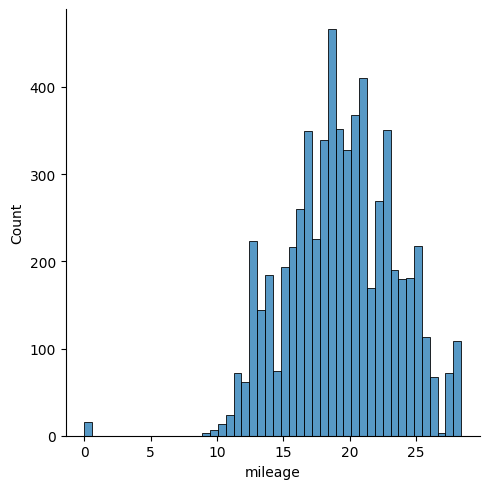

In [142]:
# now checking the distribution of columsn
sns.displot(x='mileage', data = X_train)

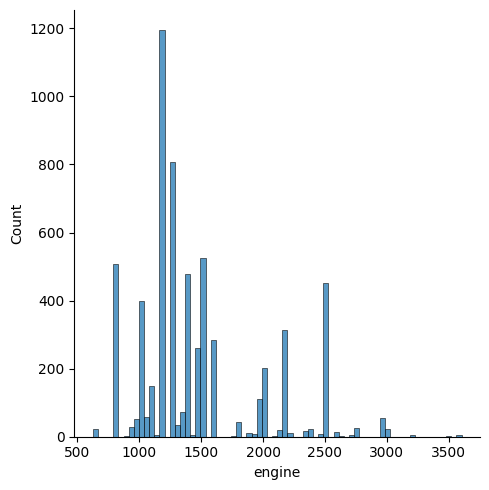

In [143]:
# now checking the distribution of columsn
sns.displot(x='engine', data = X_train)

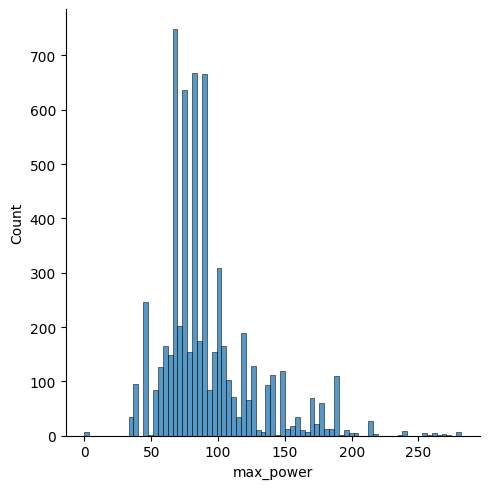

In [144]:
# now checking the distribution of columsn
sns.displot(x='max_power', data = X_train)

In [147]:
# Since I am going to taking Engine because it is highly correlated with the max_power.
X_train = X_train[['year','max_power','brand','mileage','fuel']]
X_test = X_test[['year','max_power','brand','mileage','fuel']]

In [148]:
# Now filling missing values in Training Dataset
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace = True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace = True)

# Now filling missing values in Training Dataset
X_test['mileage'].fillna(X_test['mileage'].mean(), inplace = True)
X_test['max_power'].fillna(X_test['max_power'].median(), inplace = True)

In [149]:
X_train.isnull().sum()

year         0
max_power    0
brand        0
mileage      0
fuel         0
dtype: int64

In [150]:
X_test.isnull().sum()

year         0
max_power    0
brand        0
mileage      0
fuel         0
dtype: int64

## Checking outlier

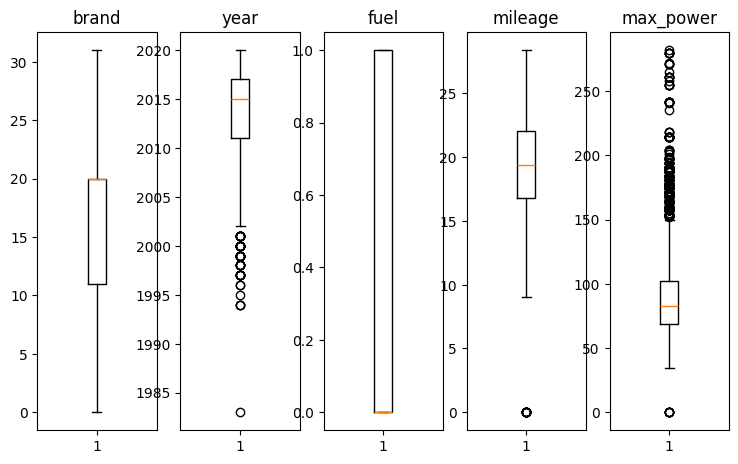

In [151]:
# Creating a dictionary of columns:
col_dict = {"brand":1, "year":2,"fuel":3,"mileage":4,"max_power":5}
# Detecting outliers in each variable using box plots.
plt.figure(figsize=(20, 30))
for variable, i in col_dict.items():
    plt.subplot(5,11, i)
    plt.boxplot(X_train[variable])
    plt.title(variable)

In [152]:
# Defining a function to calculate the outliers in each features as it will decrease data quality in turn the efficiency of our model will also be negatively impacted
def outlier_count(col, data = X_train):
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [153]:
# Printing all the outliers in each of the features
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%


## Scaling

In [154]:
# We will do scalling based on the data distribution. Only for numerical
from sklearn.preprocessing import StandardScaler
num_cols = ['max_power','mileage']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [155]:
X_train.head()

,year,max_power,brand,mileage,fuel
2982,2016,-1.088215,26,1.458607,1
2430,2013,-1.258879,20,0.846119,1
6294,2009,-0.247691,11,0.000000,1
6255,2018,1.772125,28,-0.449432,0
4253,1999,-0.670086,22,-1.155180,0


In [156]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)


Shape of X_train:  (6422, 5)
Shape of X_test:  (1606, 5)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


## Modeling

In [157]:
# Using the Random Forest Regressor as it is a regression based problem
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = RandomForestRegressor()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
print(yhat)
feature_importances = lr.feature_importances_
print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

[12.33201185 13.79284624 12.77331224 ... 10.69084563 13.4225884
 12.80660095]
MSE:  0.045114369410226514
r2:  0.9366497016292697


In [159]:
# Performing Cross validation to compare the efficincy of different algorithms in our model
from sklearn.ensemble import RandomForestRegressor #we are using regression models
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


# models that we will be using, putting them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [160]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

# Defining the cross-validation strategy using KFold with 5 splits
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.1036221  -0.10433668 -0.11384662 -0.1025878  -0.10981032]; Mean: -0.10684070470576126
SVR - Score: [-0.67195186 -0.64694165 -0.70019938 -0.6628888  -0.64665109]; Mean: -0.6657265557197395
KNeighbors Regressor - Score: [-0.05742485 -0.05708414 -0.0600926  -0.05331082 -0.06798156]; Mean: -0.05917879391426636
Decision-Tree Regressor - Score: [-0.06358807 -0.0675054  -0.06344833 -0.05873218 -0.06634466]; Mean: -0.06392373016521027
Random-Forest Regressor - Score: [-0.0494709  -0.05172033 -0.05147661 -0.04648121 -0.05597013]; Mean: -0.051023837263505255


## Grid Search
According to Cross validation random Forest Regressor (the model that is used) is the model with the highest efficiency. Hence now searching for the best version of the model through grid search

In [161]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid to search over
param_grid = {'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

# Creating the Random Forest Regressor Object
rfr = RandomForestRegressor(random_state = 1)

# Creating the Random Forest Regressor instance with a fixed random state for reproducibility
grid = GridSearchCV(estimator = rfr, # Using the Random Forest Regressor instance
                    param_grid = param_grid, # Testing the different combinations of parameters from the param_grid
                    cv = kfold, # Using the defined KFold cross-validation strategy
                    n_jobs = -1, # Using all available CPU cores for parallel processing
                    return_train_score=True, # Including training scores in the results
                    refit=True, # Refitting the best model on the full dataset after finding the best parameters
                    scoring='neg_mean_squared_error') # Using negative mean squared error as the scoring metric

# Fitting the grid search to the training data
grid.fit(X_train, y_train)

# Getting the best parameters and best negative MSE score
best_params = grid.best_params_ # Best combination of parameters found during the search
best_mse = -grid.best_score_  # Best negative MSE score; negate to get actual MSE value

# Printing the results
print("Best Parameters:", best_params)
print("Best MSE:", best_mse)

Python(25080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(25081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(25082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(25083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(25084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(25085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(25086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(25087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(25088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(25089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Best Parameters: {'max_depth': None, 'n_estimators': 15}
Best MSE: 0.051745173716903924


## Testing

In [166]:
# Storing the predicted values for the target found by the best model based on GridSearchCV
yhat = grid.predict(X_test)

# Calculating the MSE
print("MSE: ", mean_squared_error(y_test, yhat))
print("R2: ", r2_score(y_test, yhat))

MSE:  0.04511235838409723
R2:  0.9366525255434014


In [167]:
# Comparing the actual and predicted selling prices
# Setting the desired decimal precision for display
pd.options.display.float_format = '{:.2f}'.format  # Set to 2 decimal places

pd.DataFrame({'Actual Price:': np.exp(y_test), 'Predicted Price:': np.exp(yhat)})

,Actual Price:,Predicted Price:
5948,225000.00,236213.19
6039,900000.00,977451.46
3069,320000.00,352133.73
6531,650000.00,488607.28
322,520000.00,641828.08
...,...,...
4663,440000.00,460531.68
2977,700000.00,894760.65
2459,60000.00,43216.21
928,750000.00,672248.03


In [168]:
#note that grid here is the Random Forest Regressor
# As the alogorith provides the feature importance score we are checking it
rfr = grid.best_estimator_

rfr.feature_importances_

array([0.46272196, 0.46362011, 0.02759244, 0.03590217, 0.01016331])

<BarContainer object of 5 artists>

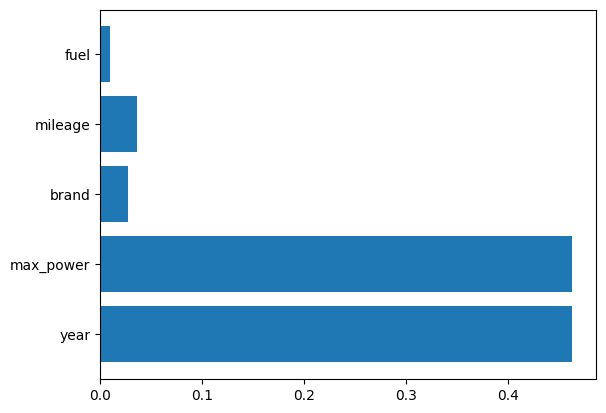

In [170]:
# Plotting the Bar Graph of the columns and their importance
plt.barh(X_train.columns, rfr.feature_importances_)

Text(0.5, 0, 'Random Forest Regressor Feature Importance')

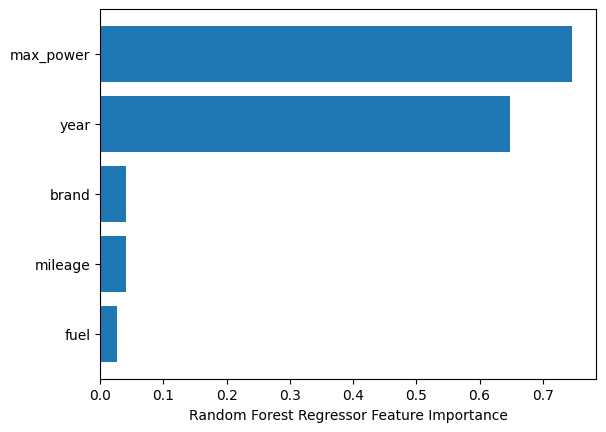

In [171]:
from sklearn.inspection import permutation_importance
# Calculating the permutation importance using the Random Forest Regressor model (rfr) on the test data (X_test, y_test)
perm_importance = permutation_importance(rfr, X_test, y_test)

# Sorting the feature indices by mean importance score
sorted_idx = perm_importance.importances_mean.argsort()

# Plotting the feature importances in a horizontal bar plot
plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])

plt.xlabel("Random Forest Regressor Feature Importance")

## Inference

In [174]:
import pickle
# Saving the model to disk
filename = 'Model/car-prediction.model'
pickle.dump(grid, open(filename, 'wb'))
label_encoder_brand_path = 'Model/brand-label.model'
label_encoder_fuel_path = 'Model/brand-fuel.model'
scaler_path = 'Model/car-scalar.model'
feature_importance_path = 'Model/feature_importance.model;'
pickle.dump(label_brand, open(label_encoder_brand_path, 'wb'))
pickle.dump(label_fuel, open(label_encoder_fuel_path, 'wb'))
pickle.dump(scaler, open(scaler_path, 'wb'))
pickle.dump(rfr, open(feature_importance_path, 'wb'))
print(filename)

Model/car-prediction.model


In [175]:
# loading the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
scalar_model = pickle.load(open(scaler_path, 'rb'))
label_brand_model = pickle.load(open(label_encoder_brand_path, 'rb'))
label_fuel_model = pickle.load(open(label_encoder_fuel_path, 'rb'))
feature_importances_model = pickle.load(open(feature_importance_path, 'rb'))

### Working with Example

In [176]:
sample = df[['year','max_power','brand','mileage','fuel']].loc[1].to_frame().T
sample

,year,max_power,brand,mileage,fuel
1,2014.00,103.52,27.00,21.14,0.00


In [179]:
sample[num_cols]

,max_power,mileage
1,103.52,21.14


In [180]:
sample[num_cols] = scalar_model.transform(sample[num_cols])
sample

,year,max_power,brand,mileage,fuel
1,2014.00,0.34,27.00,0.44,0.00


In [181]:
predicted_selling_price = loaded_model.predict(sample)
# np.set_printoptions(precision=2)
print("Predicted Price: ", str(np.exp(predicted_selling_price)))

Predicted Price:  [416784.09179758]


### Report for Car Price Prediction

This is a ***Random Forest Regression*** model that predicts car prices based on the features Year, Max Power, Brand, Mileage, and Fuel Type. The model was developed after analyzing feature importances and performing cross-validation among different algorithms.

Initially, the dataset included the features: Name, Year, Km_driven, Fuel, Seller Type, Transmission, Owner, Mileage, Engine, Max Power, Torque, and Seats, with Selling Price as the target label.

As per the stated instructions, some string fields were trimmed, and processes such as label encoding, scaling, and filling of missing values were performed. Since Random Forest can handle categorical features, one-hot encoding was not applied.

### Feature Selection

Features such as Brand, Year, Max Power, Mileage, and Fuel Type were identified as the most influential in predicting the target variable.

Brand: The brand of a car plays a significant role in determining its selling price. Premium and trusted brands generally command higher prices compared to less recognized counterparts.

Year: The year indicates the age of the vehicle. Newer cars typically include advanced features, improved safety standards, and updated technology, making them more valuable. Thus, the year helps capture the time-based depreciation effect on price.

Max Power and Mileage: These are key indicators of efficiency and performance. Higher max power reflects stronger performance, while better mileage indicates lower running costs. Together, they strongly influence resale value.

Fuel Type: Fuel type affects both long-term operating costs and environmental considerations. In addition, fluctuations in fuel prices can directly influence demand and thus the resale price (cheaper fuel types often raise the market value of cars using them).

Other features such as Seats, Seller Type, and Owner were excluded, as they showed relatively low influence on price and are more related to buyer preference. Engine and Max Power are highly correlated since engine performance directly determines power. Therefore, only the feature with higher predictive strength was retained.

## Algorithm

The Random Forest Regressor was chosen because it effectively handles non-linear relationships, captures complex feature interactions, and is robust against outliers.

Other algorithms were not selected for the following reasons:

Linear Regression: This method assumes linear relationships between features and the target variable. While some factors (e.g., year vs. price) may follow a linear trend, others (e.g., brand vs. price) are more complex and non-linear, which linear regression cannot capture effectively.

Deep Learning Models: Although powerful, these models typically require significant computational resources and longer training times, making them less practical for this task.

Regularization Techniques (L1, L2): While helpful in reducing overfitting for simpler models, they are not sufficient to fully address the complexity of car price prediction.

Therefore, the Random Forest Regressor was selected as the most suitable model for this regression problem.



### Conclusions

In summary, the feature importance analysis revealed that ‘max_power’, ‘brand’, ‘mileage’, and ‘fuel’ play a crucial role in predicting car selling prices. To perform the prediction, the Random Forest Regressor was employed, as it provides strong predictive accuracy for regression-based datasets like this one.

# This app is uploaded in my Github:
- https://github.com/lamanabin2046/Car_Price_Preddiction01